In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
news_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
labels=news_data[1]
labels.head()     
X = news_data[0]
Y=news_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_train = x_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
x_test = x_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1  
data = []
punc = '.'
for i in x_train:
  i = i[:-1]
  token = word_tokenize(i)
  if punc in token:
    for index ,val in enumerate(token):
      if punc == val:
        token.pop(index)           
  data.append(token)
x_train = tokenizer.texts_to_sequences(data) 
x_test = tokenizer.texts_to_sequences(x_test)
maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
print(('X_train shape:', x_train.shape))
print(('X_test shape:', x_test.shape))
print(('y_train shape:', y_train.shape))
print(('y_test shape:', y_test.shape))

('X_train shape:', (2276, 100))
('X_test shape:', (120, 100))
('y_train shape:', (2276,))
('y_test shape:', (120,))


In [28]:
# news_data.dropna(axis=0, inplace=True)
# x = news_data[0]
# y = news_data[1]
# x_train , x_test ,y_train ,  y_test = train_test_split(x, y, test_size = 0.1)

In [29]:
# print(len(x_train))
# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index)
        
#     data.append(token)
    
# print(data)  

In [30]:
# tokenizer = Tokenizer(num_words=5000) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)
# x_train = tokenizer.texts_to_sequences(x_train)
# x_test = tokenizer.texts_to_sequences(x_test)

In [31]:
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# print(x_train)
# news_data.info()

word_index = tokenizer.word_index
vocab_size=len(word_index)

#LSTM

In [32]:
# Import tensor representations for words

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
#print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2021-10-25 08:53:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c03::80, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-10-25 08:53:01 ERROR 404: Not Found.



In [33]:
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import LSTM, Embedding, Dense
# from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
# print(x_train.shape)
# model = Sequential()
# input_word = Input(shape=(7026,))
# model = Embedding(input_dim=x_train.shape[0], output_dim=1, input_length=100)(input_word)
# model = SpatialDropout1D(0.1)(model)
# model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
# out = TimeDistributed(Dense(1, activation="sigmoid"))(model)
# model = Model(input_word, out)
# model.summary()
def create_model(x_train, y_train, x_test, y_test):
    num_classes = 1 # y_train.shape[1]
    num_tokens = 100 #x_train.shape[1]
    print(num_classes)
    print(num_tokens)
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim = {{choice([16,32,60, 80, 100])}}, input_length = 100))
    model.add(Dropout({{choice([0.3, 0.4, 0.5, 0.6])}}))
    model.add(Conv1D(filters = {{choice([32,50, 60, 80])}}, kernel_size = {{choice([3,6,10,15,20,30])}}, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPool1D())
    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['adam', 'sgd'])}},
                  metrics=['acc'])

    # Optional to log output from Keras
    #csv_logger = keras.callbacks.CSVLogger('Logs/dl_model.log')
    
    result = model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=0,
              validation_split=0.1)
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [34]:
# model.compile(optimizer="adam",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
# print(x_train.shape , y_train.shape)

# history = model.fit(
#     x=x_train,
#     y=y_train,
#     epochs=10
# )

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=[x_test, y_test])

print("Training Complete")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         856200    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 20)          6800      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)               

In [36]:
# embedding_dim = 50


#Running ML Models

In [37]:
# from keras import layers

# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_train, y_train,epochs=10,batch_size=10)
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [38]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()


In [39]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [40]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [41]:
news_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
labels=news_data[1]
labels.head()     
X = news_data[0]
Y=news_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.1, random_state=7)
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')


train=x_train
test=x_test
train = train.map(lambda x: cleantext(x))
test = test.map(lambda x: cleantext(x))
y_train=y_train.astype('int')
y_test=y_test.astype('int')


#SVM

SVM
test:
[[170  15]
 [ 47   8]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       185
           1       0.35      0.15      0.21        55

    accuracy                           0.74       240
   macro avg       0.57      0.53      0.53       240
weighted avg       0.68      0.74      0.70       240

Accuracy :  0.7416666666666667
Precison :  0.8447952497952499
Recall :  0.7416666666666667
F1 :  0.7843761959433603


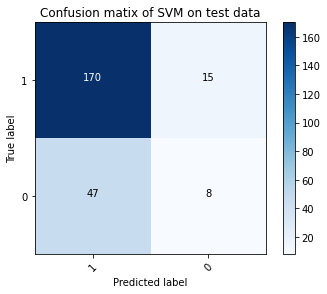

In [42]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train,y_train)
print('SVM')
print ('test:')
pred=pipeline.predict(test)
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of SVM on test data')

#Logistic Regression

Logistic Regression
Test:
[[185   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       185
           1       0.00      0.00      0.00        55

    accuracy                           0.77       240
   macro avg       0.39      0.50      0.44       240
weighted avg       0.59      0.77      0.67       240

Accuracy :  0.7708333333333334
Precison :  1.0
Recall :  0.7708333333333334
F1 :  0.8705882352941177


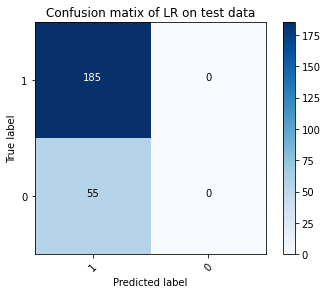

In [43]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train,y_train)
print('Logistic Regression')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of LR on test data')

#Gradient Boosting Classifier

Gradient Boost
Test:
[[180   5]
 [ 53   2]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       185
           1       0.29      0.04      0.06        55

    accuracy                           0.76       240
   macro avg       0.53      0.50      0.46       240
weighted avg       0.66      0.76      0.68       240

Accuracy :  0.7583333333333333
Precison :  0.9456552006552007
Recall :  0.7583333333333333
F1 :  0.8380061223439832


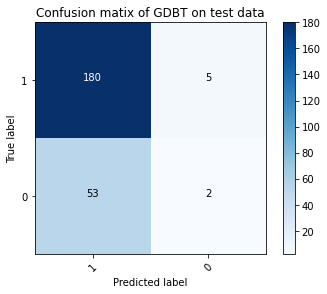

In [44]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Gradient Boost')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

#Decision Tree Classifier

Decision Tree
Test:
[[158  27]
 [ 47   8]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       185
           1       0.23      0.15      0.18        55

    accuracy                           0.69       240
   macro avg       0.50      0.50      0.49       240
weighted avg       0.65      0.69      0.67       240

Accuracy :  0.6916666666666667
Precison :  0.7507166257166258
Recall :  0.6916666666666667
F1 :  0.7180199430199431


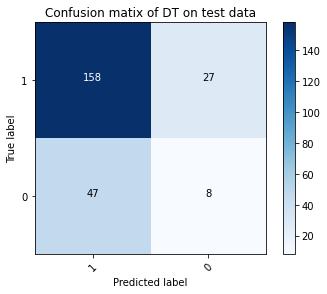

In [45]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Decision Tree')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of DT on test data')

#Random Forest Classifier

Random Forest Classifier
Test:
[[177   8]
 [ 52   3]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       185
           1       0.27      0.05      0.09        55

    accuracy                           0.75       240
   macro avg       0.52      0.51      0.47       240
weighted avg       0.66      0.75      0.68       240

Accuracy :  0.75
Precison :  0.9154054054054054
Recall :  0.75
F1 :  0.8200483091787442


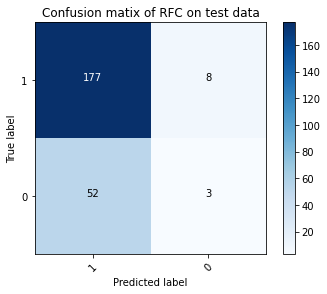

In [46]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Random Forest Classifier')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of RFC on test data')